In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("https://raw.githubusercontent.com/a-anuj/tft-traffic-volume-analysis/refs/heads/main/preprocessed_data.csv")
df

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,...,weekend,month,rush_hour,weather_main_id,weather_desc_id,holiday_id,lag_1,lag_24,roll_3,roll_24
0,24,NaN,291.97,0.0,0.0,1,Clear,sky is clear,2012-10-03 12:00:00,5097,...,0,10,0,0,27,7,5471.0,5545.0,5693.000000,3562.291667
1,25,NaN,293.23,0.0,0.0,1,Clear,sky is clear,2012-10-03 13:00:00,4887,...,0,10,0,0,27,7,5097.0,4516.0,5151.666667,3577.750000
2,26,NaN,294.31,0.0,0.0,1,Clear,sky is clear,2012-10-03 14:00:00,5337,...,0,10,0,0,27,7,4887.0,4767.0,5107.000000,3601.500000
3,27,NaN,295.17,0.0,0.0,1,Clear,sky is clear,2012-10-03 15:00:00,5692,...,0,10,0,0,27,7,5337.0,5026.0,5305.333333,3629.250000
4,28,NaN,295.13,0.0,0.0,1,Clear,sky is clear,2012-10-03 16:00:00,6137,...,0,10,1,0,27,7,5692.0,4918.0,5722.000000,3680.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48175,48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,...,1,9,0,1,2,7,3947.0,2950.0,3874.000000,2829.333333
48176,48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,...,1,9,0,1,19,7,3543.0,2607.0,3423.666667,2836.583333
48177,48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,...,1,9,0,10,21,7,2781.0,3856.0,2827.666667,2765.875000
48178,48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,...,1,9,0,1,19,7,2159.0,1826.0,2130.000000,2750.208333


In [68]:
df['holiday'] = df['holiday'].fillna("None")
df['holiday'] = df['holiday'].astype('category')


In [69]:
df

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,...,weekend,month,rush_hour,weather_main_id,weather_desc_id,holiday_id,lag_1,lag_24,roll_3,roll_24
0,24,None,291.97,0.0,0.0,1,Clear,sky is clear,2012-10-03 12:00:00,5097,...,0,10,0,0,27,7,5471.0,5545.0,5693.000000,3562.291667
1,25,None,293.23,0.0,0.0,1,Clear,sky is clear,2012-10-03 13:00:00,4887,...,0,10,0,0,27,7,5097.0,4516.0,5151.666667,3577.750000
2,26,None,294.31,0.0,0.0,1,Clear,sky is clear,2012-10-03 14:00:00,5337,...,0,10,0,0,27,7,4887.0,4767.0,5107.000000,3601.500000
3,27,None,295.17,0.0,0.0,1,Clear,sky is clear,2012-10-03 15:00:00,5692,...,0,10,0,0,27,7,5337.0,5026.0,5305.333333,3629.250000
4,28,None,295.13,0.0,0.0,1,Clear,sky is clear,2012-10-03 16:00:00,6137,...,0,10,1,0,27,7,5692.0,4918.0,5722.000000,3680.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48175,48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,...,1,9,0,1,2,7,3947.0,2950.0,3874.000000,2829.333333
48176,48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,...,1,9,0,1,19,7,3543.0,2607.0,3423.666667,2836.583333
48177,48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,...,1,9,0,10,21,7,2781.0,3856.0,2827.666667,2765.875000
48178,48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,...,1,9,0,1,19,7,2159.0,1826.0,2130.000000,2750.208333


In [70]:
df = df.drop("Unnamed: 0",axis=1)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,...,weekend,month,rush_hour,weather_main_id,weather_desc_id,holiday_id,lag_1,lag_24,roll_3,roll_24
0,None,291.97,0.0,0.0,1,Clear,sky is clear,2012-10-03 12:00:00,5097,12,...,0,10,0,0,27,7,5471.0,5545.0,5693.000000,3562.291667
1,None,293.23,0.0,0.0,1,Clear,sky is clear,2012-10-03 13:00:00,4887,13,...,0,10,0,0,27,7,5097.0,4516.0,5151.666667,3577.750000
2,None,294.31,0.0,0.0,1,Clear,sky is clear,2012-10-03 14:00:00,5337,14,...,0,10,0,0,27,7,4887.0,4767.0,5107.000000,3601.500000
3,None,295.17,0.0,0.0,1,Clear,sky is clear,2012-10-03 15:00:00,5692,15,...,0,10,0,0,27,7,5337.0,5026.0,5305.333333,3629.250000
4,None,295.13,0.0,0.0,1,Clear,sky is clear,2012-10-03 16:00:00,6137,16,...,0,10,1,0,27,7,5692.0,4918.0,5722.000000,3680.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48175,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,...,1,9,0,1,2,7,3947.0,2950.0,3874.000000,2829.333333
48176,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,...,1,9,0,1,19,7,3543.0,2607.0,3423.666667,2836.583333
48177,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,...,1,9,0,10,21,7,2781.0,3856.0,2827.666667,2765.875000
48178,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,...,1,9,0,1,19,7,2159.0,1826.0,2130.000000,2750.208333


In [71]:
import torch
from sklearn.preprocessing import StandardScaler

from pytorch_forecasting import TimeSeriesDataSet,TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import RMSE
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint


In [7]:
!pip install -q \
    pytorch-lightning==2.2.1 \
    torchmetrics \
    pytorch-forecasting==1.5.0 \
    pandas \
    numpy \
    scikit-learn \
    matplotlib \
    statsmodels \
    optuna \
    python-dateutil


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.9/827.9 kB 64.3 MB/s eta 0:00:00


In [ ]:
torch.cuda.is_available(), torch.cuda.get_device_name(0)


(True, 'Tesla T4')

In [ ]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour', 'weekday',
       'weekend', 'month', 'rush_hour', 'weather_main_id', 'weather_desc_id',
       'holiday_id', 'lag_1', 'lag_24', 'roll_3', 'roll_24'],
      dtype='object')

In [72]:
df = df.copy()
assert 'date_time' in df.columns
df['data_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values('date_time').reset_index(drop=True)

In [73]:
df["time_idx"] = np.arange(len(df))
df["series"] = 0

### time_idx column is necessary for TFT to be trained which must be continuous. series here is set to 0 because we are interpreting the traffic details of only one city. If more cities are included then series value will be a unique number attached to each city

In [74]:
categorical_cols = ["weather_main_id", "weather_desc_id", "holiday_id"]

for col in categorical_cols:
    df[col] = df[col].astype(str).astype("category")


In [75]:
continuous_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'lag_1', 'lag_24', 'roll_3', 'roll_24']


In [76]:
time_varying_known_reals = ['time_idx', 'hour', 'weekday', 'month', 'rush_hour']  # integers, known ahead
time_varying_unknown_reals = ['traffic_volume']
time_varying_known_categoricals = [c for c in ['weather_main_id', 'weather_desc_id', 'holiday_id'] if c in df.columns]

In [77]:
train_df = df[df['date_time'] < "2017-01-01"].copy()
val_df   = df[(df['date_time'] >= "2017-01-01") & (df['date_time'] < "2018-01-01")].copy()
test_df  = df[df['date_time'] >= "2018-01-01"].copy()

In [78]:
print("rows:", len(train_df), len(val_df), len(test_df))


rows: 29626 10605 7949


In [79]:
if continuous_cols:
    scaler = StandardScaler()
    df.loc[train_df.index, continuous_cols] = scaler.fit_transform(train_df[continuous_cols])
    df.loc[val_df.index, continuous_cols] = scaler.transform(val_df[continuous_cols])
    df.loc[test_df.index, continuous_cols] = scaler.transform(test_df[continuous_cols])


/tmp/ipython-input-646284666.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-1.27224475 -1.27224475 -1.27224475 ...  1.0303429   0.64226633
  1.0303429 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[train_df.index, continuous_cols] = scaler.fit_transform(train_df[continuous_cols])


In [80]:
max_encoder_length = 168 # One week lookback (24*7=168)
max_prediction_length = 24 # Predict the next 24 hours by evaluating the last one week data

In [81]:
training_cutoff = train_df['time_idx'].max()

In [82]:
print(df[['weather_main_id','weather_desc_id','holiday_id']].dtypes)
print(train_df[['weather_main_id','weather_desc_id','holiday_id']].dtypes)


weather_main_id    category
weather_desc_id    category
holiday_id         category
dtype: object
weather_main_id    category
weather_desc_id    category
holiday_id         category
dtype: object


In [83]:
training = TimeSeriesDataSet(
    train_df,
    time_idx='time_idx',
    target='traffic_volume',
    group_ids=['series'],
    min_encoder_length=24,    # allow shorter contexts for early windows
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=time_varying_unknown_reals,
    time_varying_known_categoricals=time_varying_known_categoricals,
    static_categoricals=[],   # no static features
    static_reals=[],
    target_normalizer=GroupNormalizer(groups=['series']), # normalizes target per series
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

In [84]:
validation = TimeSeriesDataSet.from_dataset(training, val_df, predict=False, stop_randomization=True)
test_dataset = TimeSeriesDataSet.from_dataset(training, test_df, predict=True, stop_randomization=True)


In [85]:
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=4)
val_dataloader   = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=4)
test_dataloader  = test_dataset.to_dataloader(train=False, batch_size=batch_size, num_workers=4)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [86]:
hidden_size = 32
attention_head_size = 4

In [87]:
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=1e-3,
    hidden_size=hidden_size,
    attention_head_size=attention_head_size,
    dropout=0.1,
    hidden_continuous_size=16,
    output_size=1,                # predicting point value per horizon step
    loss=RMSE(),                  # use RMSE as training loss (can change)
    log_interval=10,
    reduce_on_plateau_patience=4,
)

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [88]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    mode="min",
    save_top_k=1,
    filename="tft-{epoch:02d}-{val_loss:.4f}"
)

early_stop_callback = EarlyStopping(
    monitor="val_loss",
    patience=8,
    mode="min"
)
tft.train()
# --------- CPU Trainer (correct) ----------
trainer = Trainer(
    max_epochs=20,
    accelerator="gpu",
    devices=1,               # CPU = must be 1
    gradient_clip_val=0.1,
    precision=32,
)



INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores


In [89]:
with open("models/full_dataset.pkl", "wb") as f:
    pickle.dump(training, f)


In [26]:


trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | RMSE                            | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 594    | train
3  | prescalers                         | ModuleDict                      | 320    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 5.7 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 15.1 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 12.9 K | train
7  | static_context_variable_selectio

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [27]:
predictions = tft.predict(test_dataloader)  

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our su

In [28]:
actuals = []

for batch in test_dataloader:
    # batch is (input_dict, (y, None))
    y = batch[1][0]          # the real decoder target tensor
    actuals.append(y.numpy())

actuals = np.vstack(actuals)

In [29]:
pred_np = predictions.detach().cpu().numpy()   # shape (N, 24)
actuals_np = actuals                           

In [30]:
def rmse(a, b):
    return np.sqrt(np.mean((a - b) ** 2))



In [31]:
print("Overall RMSE:", rmse(pred_np.ravel(), actuals_np.ravel()))
print("RMSE t+1:", rmse(pred_np[:, 0], actuals_np[:, 0]))
print("RMSE t+6:", rmse(pred_np[:, 5], actuals_np[:, 5]))
print("RMSE t+24:", rmse(pred_np[:, 23], actuals_np[:, 23]))


Overall RMSE: 185.865601498076
RMSE t+1: 31.478759765625
RMSE t+6: 158.5860595703125
RMSE t+24: 100.82763671875


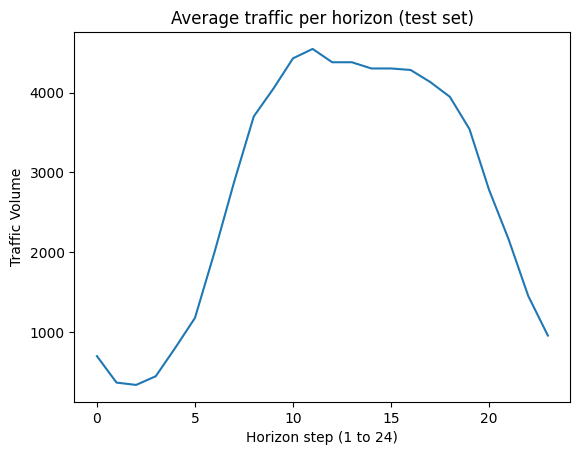

In [32]:
import numpy as np

mean_actual = actuals_np.mean(axis=0)
import matplotlib.pyplot as plt

plt.plot(mean_actual)
plt.title("Average traffic per horizon (test set)")
plt.xlabel("Horizon step (1 to 24)")
plt.ylabel("Traffic Volume")
plt.show()


In [33]:
trainer.save_checkpoint("models/tft.ckpt")


In [53]:
import os
os.getcwd()

'/content'

In [56]:
import os
os.makedirs("/home/a-anuj/Projects/traffic-volume-forecast-tft/data", exist_ok=True)


In [57]:
import shutil

shutil.copy("/content/models/tft.ckpt", "/home/a-anuj/Projects/traffic-volume-forecast-tft/data/tft.ckpt")
shutil.copy("/content/models/tft_dataset_params.pkl", "/home/a-anuj/Projects/traffic-volume-forecast-tft/data/tft_dataset_params.pkl")
shutil.copy("/content/data/test_data.csv", "/home/a-anuj/Projects/traffic-volume-forecast-tft/data/test_data.csv")


'/home/a-anuj/Projects/traffic-volume-forecast-tft/data/test_data.csv'

In [58]:
trainer.save_checkpoint("/home/a-anuj/Projects/traffic-volume-forecast-tft/models/tft.ckpt")


In [59]:
os.getcwd()

'/content'

In [60]:
os.listdir()

['.config',
 'tft_export.zip',
 'models1',
 'data',
 'export',
 'models',
 'content',
 'lightning_logs',
 'sample_data']

In [90]:
!zip -r /content/export.zip /content/models /content/data


updating: content/models/ (stored 0%)
updating: content/models/tft.ckpt (deflated 29%)
updating: content/models/tft_dataset_params.json (deflated 59%)
updating: content/models/tft_dataset_params.pkl (deflated 65%)
updating: content/data/ (stored 0%)
updating: content/data/test_data.csv (deflated 80%)
  adding: content/models/full_dataset.pkl (deflated 86%)


In [91]:
import base64

filepath = "/content/export.zip"

with open(filepath, "rb") as f:
    data = f.read()

b64 = base64.b64encode(data).decode()

download_html = f'''
<a download="export.zip" href="data:application/zip;base64,{b64}" target="_blank">
Click here to download export.zip
</a>
'''

from IPython.display import HTML
HTML(download_html)
